In [ ]:
! pip install catboost
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

     |████████████████████████████████| 66.3MB 57kB/s 


Dataset link: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [ ]:
#reading the dataset
df=pd.read_csv("train.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
cols = df.columns

for i in cols:
    if df[i].isnull().sum() != 0:
        print("Column name is:", i)
        print(df[i].isnull().sum())

Column name is: Gender
13
Column name is: Married
3
Column name is: Dependents
15
Column name is: Self_Employed
32
Column name is: LoanAmount
22
Column name is: Loan_Amount_Term
14
Column name is: Credit_History
50


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#filling missing values
print(df['Gender'].value_counts())
df['Gender'].fillna('Male', inplace=True)

print(df['Married'].value_counts())
df['Married'].fillna('Yes', inplace=True)

print(df['Dependents'].value_counts())
df['Dependents'].fillna('0', inplace=True)

print(df['Self_Employed'].value_counts())
df['Self_Employed'].fillna('No', inplace=True)

print(df.LoanAmount.describe())
df['LoanAmount'].fillna(df.LoanAmount.mean(), inplace = True)

print(df['Loan_Amount_Term'].value_counts())
df['Loan_Amount_Term'].fillna(512, inplace=True)

print(df['Credit_History'].value_counts())
df['Credit_History'].fillna(1.0, inplace=True)

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [ ]:
# Get categorical columns
cat_cols = []
for i in cols:
    if df[i].dtypes == 'object' and i!= 'Loan_ID':
        print(i)
        cat_cols.append(i)

# Do label encoding for categorical columns
le = LabelEncoder()
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [ ]:
#split dataset into train and test

train, test = train_test_split(df, test_size=0.3, random_state=0)

x_train=train.drop(['Loan_Status', 'Loan_ID'], axis=1)
y_train=train['Loan_Status']

x_test=test.drop(['Loan_Status', 'Loan_ID'], axis=1)
y_test=test['Loan_Status']

#### LogisticRegression 

In [ ]:
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8324324324324325

#### SVM 

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7243243243243244

In [ ]:
model = svm.SVC(kernel='poly',degree=10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7189189189189189

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8162162162162162

#### Decission Tree 

In [ ]:
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7621621621621621

#### Random Forest 

In [ ]:
model= RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7945945945945946

In [ ]:
model= RandomForestClassifier(n_estimators=250,max_depth=3)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [ ]:
# Get feature importance
for i, j in sorted(zip(x_train.columns, model.feature_importances_)):
    print(i, j)

ApplicantIncome 0.0914217015372031
CoapplicantIncome 0.05978571671817359
Credit_History 0.5970604558982092
Dependents 0.020366296391574962
Education 0.029729540280313375
Gender 0.002650472027742256
LoanAmount 0.10356065916385716
Loan_Amount_Term 0.03375750167119457
Married 0.018584712604192723
Property_Area 0.03673012824009951
Self_Employed 0.0063528154674396915


#### XGBoost 

In [ ]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [ ]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.1,n_estimators=400)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7837837837837838

#### LightGBM 

In [ ]:
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
    if y_pred[i]>=0.5: 
        y_pred[i]=1
else: 
    y_pred[i]=0
accuracy_score(y_test, y_pred)

0.7189189189189189

#### CatBoost (Categorical Data Automatically handling)

In [ ]:
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
# here 0,1,2,3,4,10 represent index of categorical data
model.score(x_test,y_test)

Learning rate set to 0.025711
0:	learn: 0.6794857	test: 0.6808164	best: 0.6808164 (0)	total: 52.5ms	remaining: 52.5s
1:	learn: 0.6686164	test: 0.6694985	best: 0.6694985 (1)	total: 53.8ms	remaining: 26.9s
2:	learn: 0.6580962	test: 0.6584226	best: 0.6584226 (2)	total: 55ms	remaining: 18.3s
3:	learn: 0.6466061	test: 0.6481062	best: 0.6481062 (3)	total: 57.6ms	remaining: 14.3s
4:	learn: 0.6361742	test: 0.6382075	best: 0.6382075 (4)	total: 60.1ms	remaining: 11.9s
5:	learn: 0.6267725	test: 0.6280762	best: 0.6280762 (5)	total: 61.7ms	remaining: 10.2s
6:	learn: 0.6176542	test: 0.6189313	best: 0.6189313 (6)	total: 64ms	remaining: 9.08s
7:	learn: 0.6088622	test: 0.6105600	best: 0.6105600 (7)	total: 66.4ms	remaining: 8.24s
8:	learn: 0.5994512	test: 0.6021100	best: 0.6021100 (8)	total: 68.8ms	remaining: 7.58s
9:	learn: 0.5926521	test: 0.5948715	best: 0.5948715 (9)	total: 69.8ms	remaining: 6.91s
10:	learn: 0.5846648	test: 0.5867226	best: 0.5867226 (10)	total: 72.1ms	remaining: 6.48s
11:	learn: 0.57

0.8162162162162162

# Commonly used ML algorithms
Linear Regression

Logistic Regression

Decision Tree

SVM

Naive Bayes

kNN

K-Means

Random Forest

Gradient Boosting algorithms
> GBM

> XGBoost

> LightGBM

> CatBoost

# Stratified K-Fold Cross Validation
Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=20)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(x_train,y_train.values):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x_train.iloc[train_index],x_train.iloc[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(x_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.6545674531155474
2 of KFold 5
ROC AUC score: 0.7235221674876848
3 of KFold 5
ROC AUC score: 0.7056650246305419
4 of KFold 5
ROC AUC score: 0.7327586206896552
5 of KFold 5
ROC AUC score: 0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


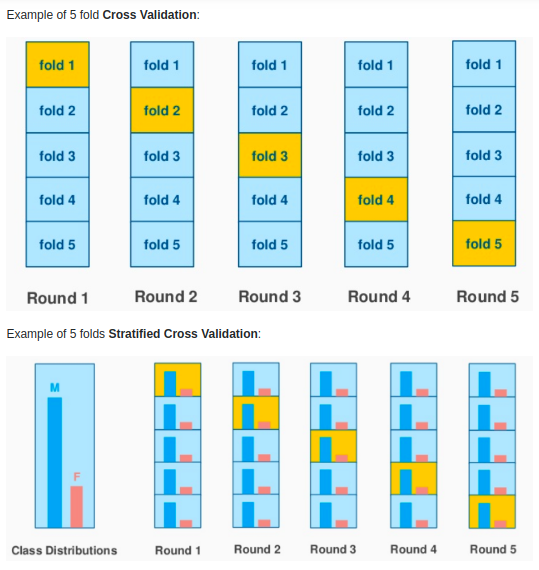

# Hyperparameter tuning
I'll discuss how to search for the optimal structure of a random forest classifer. Random forests are an ensemble model comprised of a collection of decision trees; when building such a model, two important hyperparameters to consider are:

> How many estimators (ie. decision trees) should I use?

> What should be the maximum allowable depth for each decision tree?

#Grid Search
Grid search is a traditional way to perform hyperparameter optimization. It works by searching exhaustively through a specified subset of hyperparameters.

In [ ]:
rfc = RandomForestClassifier()

n_estimators = [100,200,250,300,350]
max_depth = [2,3,4,5,8,6]
param_grid = dict(n_estimators=n_estimators,
                  max_depth=max_depth)

grid = GridSearchCV(estimator=rfc,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1,)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=2)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=3)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=4)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=8)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=6)


grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   44.6s finished


Best Score:  0.7713140610146055
Best Params:  {'max_depth': 8, 'n_estimators': 250}


# Random Search
Random search differs from grid search mainly in that it searches the specified subset of hyperparameters randomly instead of exhaustively. The major benefit being decreased processing time.
There is a tradeoff to decreased processing time, however. We aren’t guaranteed to find the optimal combination of hyperparameters.

In [ ]:
rfc = RandomForestClassifier()

n_estimators = [100,200,250,300,350]
max_depth=[2,3,4,5,8,6]
param = dict(n_estimators=n_estimators,
                  max_depth=max_depth)

random = RandomizedSearchCV(estimator=rfc,
                            param_distributions=param,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=1000. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.0s


Best Score:  0.7728588713162217
Best Params:  {'n_estimators': 100, 'max_depth': 8}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   44.9s finished


#### MaxVoting 

In [ ]:
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('NB', model3)])
model.fit(x_train,y_train)
model.score(x_test,y_test)

/home/bukka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.827027027027027

#### Weighted Averaging 

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = GaussianNB()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1 = model1.predict_proba(x_test)
pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)

weighted_prediction = (0.2*pred1)+(0.4*pred2)+(0.4*pred3)
labelprediction = np.argmax(weighted_prediction, axis = 1)

accuracy_score(labelprediction, y_test)

0.827027027027027

#### Blending 

In [ ]:
train, test = train_test_split(train, test_size=0.2, random_state=0)

x_train=train.drop(['Loan_Status', 'Loan_ID'], axis=1)
y_train=train['Loan_Status']

x_val=test.drop(['Loan_Status', 'Loan_ID'], axis=1)
y_val=test['Loan_Status']

x_val = x_val.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)

model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)

val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)

val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = LogisticRegression()
model2.fit(x_train,y_train)

val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)

val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df_val = pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test = pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression(random_state=1)
model.fit(df_val,y_val)
model.score(df_test,y_test)

0.8162162162162162

References:

    1. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
    2. https://mlwave.com/kaggle-ensembling-guide/
    3. https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
    4. https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
    5. https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/